# Programming Exam - 10.02.2023

In [1]:
import random as r
import matplotlib.pyplot as plt

In [2]:
def insert_pawn_position():
    coords = input('Please, insert starting coordinates (example: "2, 2") ')
    try:
        x, y = list(map(int, coords.split(', ')))
        if x < 0 or y < 0 or x > 4 or y > 4:
            print('Error: coordinates out of range [0, 4]')
        else:
            return x, y
    except ValueError:
        print('Not valid input')

In [3]:
class OutOfBoardException(Exception):
    pass

class MaxNumMovesException(Exception):
    pass

In [4]:
class PoliGame:
    moves = ['UP', 'RIGHT', 'DOWN', 'LEFT', 'WON!']
    
    def __init__(self):
        self.board = [r.choices(self.moves, k = 5) for _ in range(5)]
        self.pawn_pos = insert_pawn_position()
    
    def __str__(self):
        res = ''
        for i in range(5):
            for j in range(5):
                if j != 4:
                    if (i, j) == self.pawn_pos:
                        res += f'[{self.board[i][j]}]\t'
                    else:
                        res += f'{self.board[i][j]:8}'
                else:
                    if (i, j) == self.pawn_pos:
                        res += f'[{self.board[i][j]}]\n'
                    else:
                        res += f'{self.board[i][j]:8}\n'
        return res
    
    def draw_moves_plot(self):
        moves_counts = {}
        for move in sorted(self.moves):        # forgot 'self.' in self.moves
            moves_counts[move] = 0
        for i in range(5):
            for j in range(5):
                moves_counts[self.board[i][j]] += 1
        plt.bar(list(moves_counts.keys()), list(moves_counts.values()))    # wrote 'plt.barplot'
        plt.show()
    
    def one_step_move(self, max_num, moves_num = 0):
        x, y = self.pawn_pos
        if self.board[x][y] == 'WON!':
            return f'The pawn won the game in {moves_num} moves!'
        else:
            try:                                             # did not manage exceptions with try and except
                moves_num += 1
                if moves_num == max_num:
                    raise MaxNumMovesException
            except MaxNumMovesException:
                return 'The pawn lost the game because it reached the maximum number of moves allowed'
            
            if self.board[x][y] == 'UP':
                self.pawn_pos = (x - 1, y)    # subtracted to y instead
            elif self.board[x][y] == 'DOWN':
                self.pawn_pos = (x + 1, y)    # added to y instead
            elif self.board[x][y] == 'LEFT':
                self.pawn_pos = (x, y - 1)    # subtracted to x instead
            elif self.board[x][y] == 'RIGHT':
                self.pawn_pos = (x, y + 1)    # added to x instead
                
            try:                                             # did not manage exceptions with try and except
                if -1 in self.pawn_pos or 5 in self.pawn_pos:
                    raise OutOfBoardException()
                else:
                    return self.one_step_move(max_num, moves_num)
            except OutOfBoardException:
                return f'The pawn lost the game because it tried to access position ({x}, {y}) of the board'

In [5]:
def play_poligame(n, max_num):
    winning_moves_numbers = []
    for _ in range(n):
        game = PoliGame()

        with open('boards_record.txt', 'a') as f:
            f.write(str(game) + '\n')     # wrote f.write(game)

        game.draw_moves_plot()

        result = game.one_step_move(max_num)
        print(result + '\n')
        if 'won' in result:
            winning_moves_numbers.append(int(result.split(' ')[6]))

    plt.boxplot(winning_moves_numbers)
    plt.title('Distribution of the number of moves in the winning games')
    plt.xticks([])                                         # did not do this in the exam
    plt.yticks(range(2 + max(winning_moves_numbers)))      # did not do this in the exam
    plt.show()

Please, insert starting coordinates (example: "2, 2") 2, 2


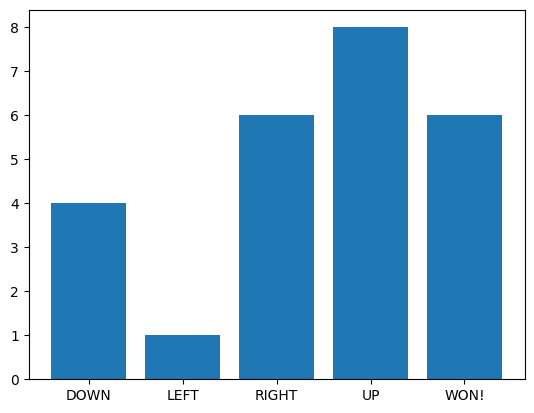

The pawn won the game in 0 moves!



In [ ]:
play_poligame(5, 10)